In [4]:
## Dementia Risk Analysis - Group Project
# --------------------------------------
# This explores how lifestyle factors such as alcohol consumption, physical activity,
# Smoking and diet affect the risk of developing dementia


In [6]:
# Dependencies (this needs to be adjusted as needed)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import scipy.stats as st
from scipy.stats import linregress
import scipy.stats as stats
import seaborn as sns

In [7]:
# Load the dataset
# Replace this with the path to your dataset
data_path = "dementia.csv"


# Display t the dataset to get a preview

# Paige

In [11]:
# first part: Data Overview - Paige
# Provide a summary of the dataset by checking for null values, basic statistics,data types, and add a visualization or table
#Read CSV
dementia_df = pd.read_csv(data_path)
dementia_df

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,...,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,NaN,NaN,60,...,Current Smoker,Negative,Sedentary,No,10,No,Low-Carb Diet,Poor,Diabetes,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,Galantamine,12.0,61,...,Former Smoker,Positive,Moderate Activity,No,1,Yes,Low-Carb Diet,Poor,Heart Disease,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,NaN,NaN,69,...,Former Smoker,Negative,Moderate Activity,No,8,No,Mediterranean Diet,Poor,Heart Disease,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,Donepezil,23.0,78,...,Never Smoked,Negative,Mild Activity,Yes,5,Yes,Balanced Diet,Poor,Hypertension,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,Memantine,20.0,77,...,Never Smoked,Positive,Mild Activity,No,0,Yes,Low-Carb Diet,Good,Diabetes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0.081825,87,93.851963,36.495134,50.380106,42.318663,Donepezil,10.0,88,...,Never Smoked,Positive,Mild Activity,No,5,No,Balanced Diet,Poor,Diabetes,1
996,1,0.145249,97,94.522391,36.270804,94.006484,52.812568,NaN,NaN,80,...,Never Smoked,Negative,Moderate Activity,No,9,Yes,Low-Carb Diet,Poor,Diabetes,0
997,1,0.073692,65,98.578388,37.065703,80.088613,13.640229,NaN,NaN,67,...,Never Smoked,Positive,Sedentary,No,8,Yes,Balanced Diet,Good,Diabetes,0
998,0,0.037347,71,91.298580,37.037202,95.322210,17.445715,Memantine,20.0,62,...,Never Smoked,Positive,Sedentary,Yes,2,No,Low-Carb Diet,Good,NaN,1


In [13]:
#Printing the Basic Statistical Summary
print("\nBasic Statistical Summary:")
stats_summary = dementia_df.describe()
print(stats_summary)


Basic Statistical Summary:
          Diabetic  AlcoholLevel    HeartRate  BloodOxygenLevel  \
count  1000.000000   1000.000000  1000.000000       1000.000000   
mean      0.513000      0.098429    79.383000         95.226051   
std       0.500081      0.058715    12.107556          2.929262   
min       0.000000      0.000414    60.000000         90.010677   
25%       0.000000      0.045505    68.000000         92.875017   
50%       1.000000      0.098235    79.000000         95.390420   
75%       1.000000      0.151840    90.000000         97.785111   
max       1.000000      0.199866   100.000000         99.999230   

       BodyTemperature       Weight    MRI_Delay  Dosage in mg          Age  \
count      1000.000000  1000.000000  1000.000000    485.000000  1000.000000   
mean         36.761513    74.321326    30.103568      9.213402    74.908000   
std           0.431701    14.463765    16.862170      6.493188     9.095068   
min          36.002108    50.069731     0.094684    

In [15]:
print("\nData Types:")
data_types = dementia_df.dtypes
print(data_types)


Data Types:
Diabetic                       int64
AlcoholLevel                 float64
HeartRate                      int64
BloodOxygenLevel             float64
BodyTemperature              float64
Weight                       float64
MRI_Delay                    float64
Prescription                  object
Dosage in mg                 float64
Age                            int64
Education_Level               object
Dominant_Hand                 object
Gender                        object
Family_History                object
Smoking_Status                object
APOE_ε4                       object
Physical_Activity             object
Depression_Status             object
Cognitive_Test_Scores          int64
Medication_History            object
Nutrition_Diet                object
Sleep_Quality                 object
Chronic_Health_Conditions     object
Dementia                       int64
dtype: object


In [17]:
#checking null values, 
null_values = dementia_df.isnull().sum() 
print(null_values)

Diabetic                       0
AlcoholLevel                   0
HeartRate                      0
BloodOxygenLevel               0
BodyTemperature                0
Weight                         0
MRI_Delay                      0
Prescription                 515
Dosage in mg                 515
Age                            0
Education_Level                0
Dominant_Hand                  0
Gender                         0
Family_History                 0
Smoking_Status                 0
APOE_ε4                        0
Physical_Activity              0
Depression_Status              0
Cognitive_Test_Scores          0
Medication_History             0
Nutrition_Diet                 0
Sleep_Quality                  0
Chronic_Health_Conditions    179
Dementia                       0
dtype: int64


## 4th Part: Nutritional Diet and Dementia Diagnosis - Feda 
## ----------------------------------------------------------
- Is there a significant relationship between the patient's nutritional diet and dementia diagnosis?
- Added multiple visualizations such as a pie chart for dementia diagnosis by diet, bar plots for cognitive scores by diet, or any graph analyze the impact of diet on different age groups.

In [20]:
#Cleaning the data
# Drop Prescription and Dosage in mg and Chronic Health Conditions
dementia_df_cleaned = dementia_df.drop(columns=['Prescription', 'Dosage in mg', 'Chronic_Health_Conditions'])

# check to confirm the changes
dementia_df_cleaned


,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Age,Education_Level,Dominant_Hand,...,Family_History,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,60,Primary School,Left,...,No,Current Smoker,Negative,Sedentary,No,10,No,Low-Carb Diet,Poor,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,61,Secondary School,Right,...,No,Former Smoker,Positive,Moderate Activity,No,1,Yes,Low-Carb Diet,Poor,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,69,Primary School,Right,...,Yes,Former Smoker,Negative,Moderate Activity,No,8,No,Mediterranean Diet,Poor,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,78,Secondary School,Left,...,Yes,Never Smoked,Negative,Mild Activity,Yes,5,Yes,Balanced Diet,Poor,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,77,Secondary School,Right,...,Yes,Never Smoked,Positive,Mild Activity,No,0,Yes,Low-Carb Diet,Good,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0.081825,87,93.851963,36.495134,50.380106,42.318663,88,Diploma/Degree,Left,...,Yes,Never Smoked,Positive,Mild Activity,No,5,No,Balanced Diet,Poor,1
996,1,0.145249,97,94.522391,36.270804,94.006484,52.812568,80,Primary School,Left,...,No,Never Smoked,Negative,Moderate Activity,No,9,Yes,Low-Carb Diet,Poor,0
997,1,0.073692,65,98.578388,37.065703,80.088613,13.640229,67,Primary School,Right,...,No,Never Smoked,Positive,Sedentary,No,8,Yes,Balanced Diet,Good,0
998,0,0.037347,71,91.298580,37.037202,95.322210,17.445715,62,No School,Left,...,Yes,Never Smoked,Positive,Sedentary,Yes,2,No,Low-Carb Diet,Good,1


In [22]:
dementia_df.columns

Index(['Diabetic', 'AlcoholLevel', 'HeartRate', 'BloodOxygenLevel',
       'BodyTemperature', 'Weight', 'MRI_Delay', 'Prescription',
       'Dosage in mg', 'Age', 'Education_Level', 'Dominant_Hand', 'Gender',
       'Family_History', 'Smoking_Status', 'APOE_ε4', 'Physical_Activity',
       'Depression_Status', 'Cognitive_Test_Scores', 'Medication_History',
       'Nutrition_Diet', 'Sleep_Quality', 'Chronic_Health_Conditions',
       'Dementia'],
      dtype='object')

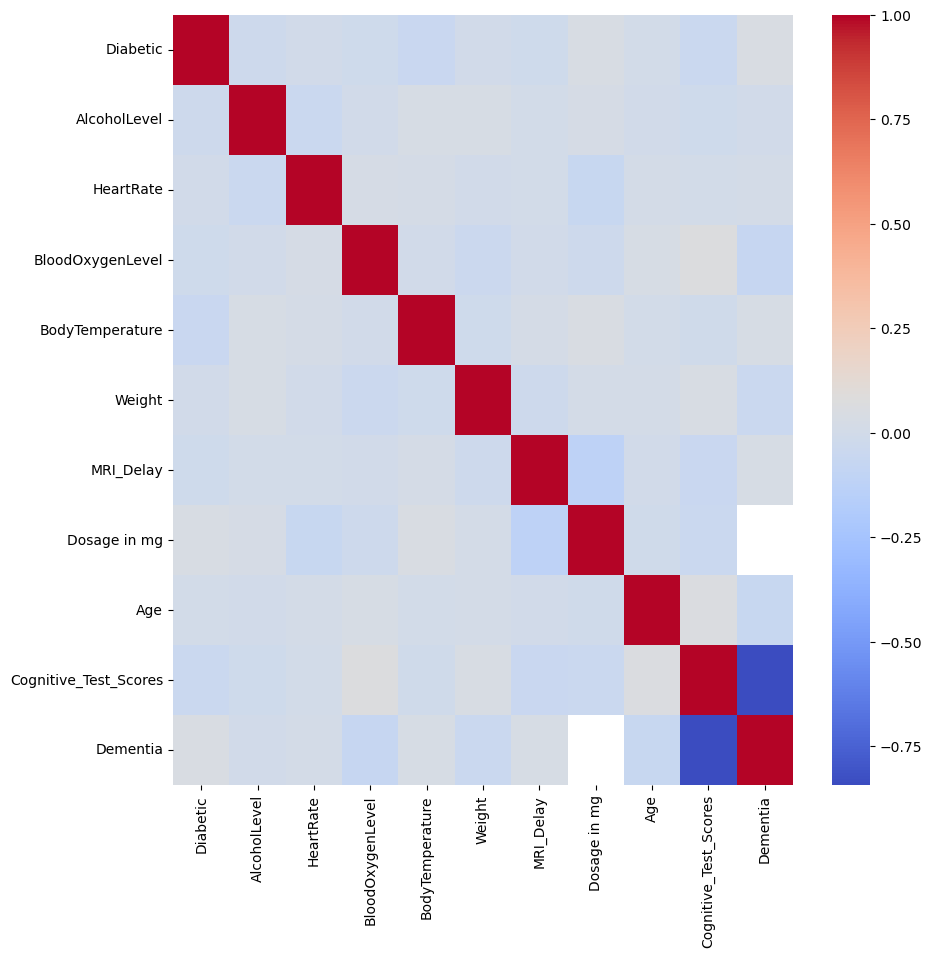

In [24]:
plt.figure(figsize=(10,10))

numeric_df = dementia_df.select_dtypes(["number"])
sns.heatmap(numeric_df.corr(), cmap='coolwarm')
plt.show()

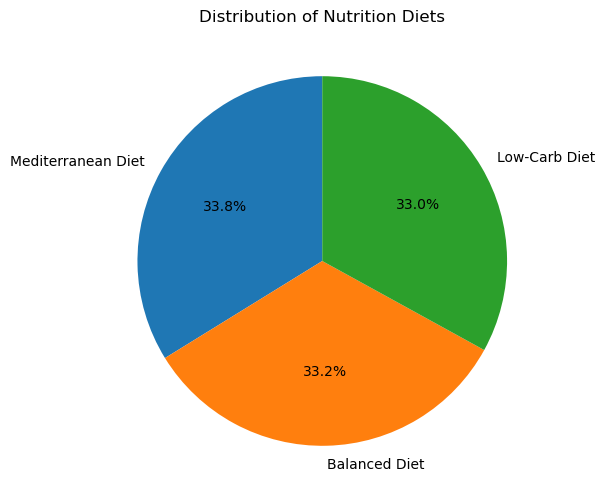

In [25]:
# Generate a pie chart of the Nutrition_Diet showing the distribution of the unique diet

# Count occurrences of each diet type
nutrition_diet = dementia_df["Nutrition_Diet"].value_counts()
    
# Use unique diet types as labels
labels = nutrition_diet.index  # Get diet names as labels
    
# Create a pie chart
plt.figure(figsize=(6,6))  # Optional: make the pie chart larger
nutrition_diet.plot.pie(
    labels=labels,        # Set labels to diet names
    autopct="%1.1f%%",    # Show percentage on the chart
    startangle=90         # Optional: start the pie chart at 90 degrees
)
    
plt.ylabel("")  # Hide the y-axis label to clean up the plot
plt.title("Distribution of Nutrition Diets")  # Optional: Add a title
plt.show()
# else:
#     print("Column 'Nutrition_Diet' not found in the DataFrame.")

<Axes: xlabel='Family_History'>

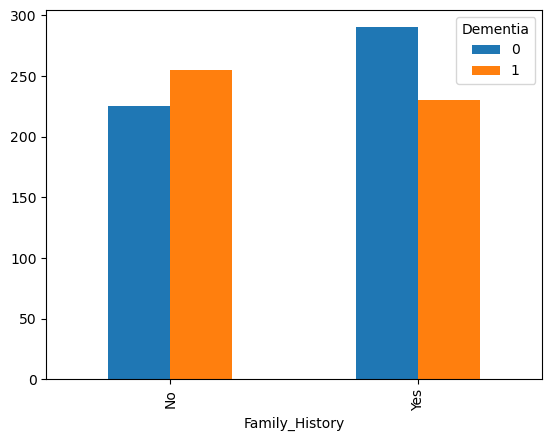

In [28]:
dementia_df.groupby(["Family_History", "Dementia"]).size().unstack().plot.bar()

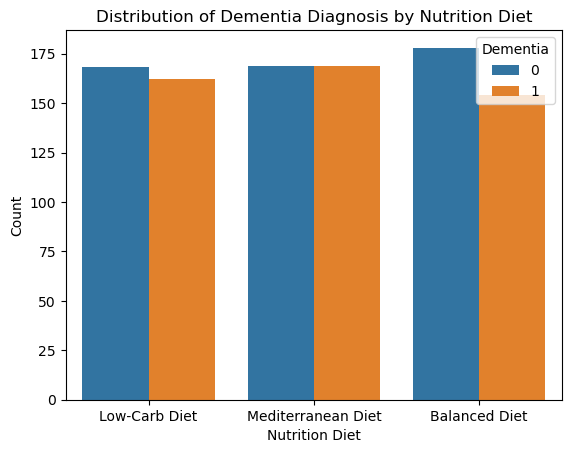

In [30]:
# Create a bar plot of Nutrition_Diet vs Dementia diagnosis
sns.countplot(data=dementia_df, x="Nutrition_Diet", hue="Dementia")

plt.title("Distribution of Dementia Diagnosis by Nutrition Diet")
plt.ylabel("Count")
plt.xlabel("Nutrition Diet")
plt.show()

In [32]:
# Contingency table between Nutrition_Diet and Dementia
contingency_table = pd.crosstab(dementia_df["Nutrition_Diet"], dementia_df["Dementia"])

# Perform the Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("There is a statistically significant association between Nutrition Diet and Dementia.")
else:
    print("There is no statistically significant association between Nutrition Diet and Dementia.")

Chi-square statistic: 0.944881061082028
P-value: 0.6234787909613961
There is no statistically significant association between Nutrition Diet and Dementia.


In [34]:
# Contingency table between Nutrition_Diet and Dementia
contingency_table = pd.crosstab(dementia_df["Family_History"], dementia_df["Dementia"])

# Perform the Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("There is a statistically significant association between Family History and Dementia.")
else:
    print("There is no statistically significant association between Family History and Dementia.")

Chi-square statistic: 7.553111903277044
P-value: 0.005990653205070485
There is a statistically significant association between Family History and Dementia.


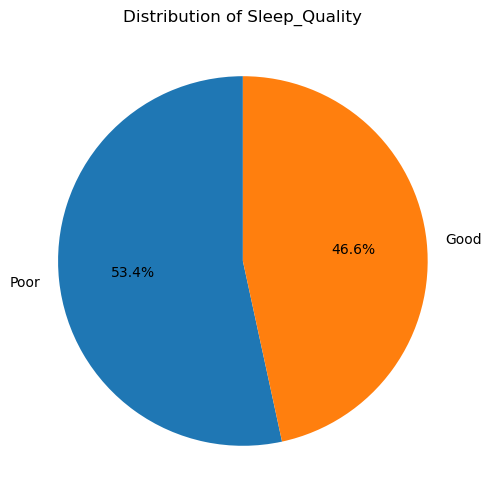

In [36]:
# Count occurrences of each diet type
sleep_quality = dementia_df["Sleep_Quality"].value_counts()
    
# Use unique diet types as labels
labels = sleep_quality.index  # Get diet names as labels
    
# Create a pie chart
plt.figure(figsize=(6,6))  # Optional: make the pie chart larger
sleep_quality.plot.pie(
    labels=labels,        # Set labels to diet names
    autopct="%1.1f%%",    # Show percentage on the chart
    startangle=90         # Optional: start the pie chart at 90 degrees
)
    
plt.ylabel("")  # Hide the y-axis label to clean up the plot
plt.title("Distribution of Sleep_Quality")  # Optional: Add a title
plt.show()
# else:
#     print("Column 'Sleep_Quality' not found in the DataFrame.")

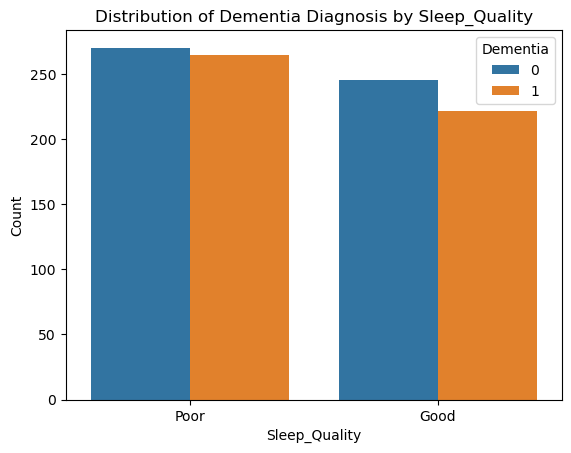

In [38]:
# Create a bar plot of Nutrition_Diet vs Dementia diagnosis
sns.countplot(data=dementia_df, x="Sleep_Quality", hue="Dementia")

plt.title("Distribution of Dementia Diagnosis by Sleep_Quality")
plt.ylabel("Count")
plt.xlabel("Sleep_Quality")
plt.show()

In [40]:
# Contingency table between Nutrition_Diet and Dementia
contingency_table = pd.crosstab(dementia_df["Sleep_Quality"], dementia_df["Dementia"])

# Perform the Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("There is a statistically significant association between Sleep_Quality and Dementia.")
else:
    print("There is no statistically significant association between Sleep_Quality and Dementia.")

Chi-square statistic: 0.3272479558329268
P-value: 0.5672841025931478
There is no statistically significant association between Sleep_Quality and Dementia.


# Pat 

In [43]:
# 2nd Part: Alcohol Consumption and Dementia 
# --------------------------------------------------------------------------------
# Does alcohol consumption level correlate with a higher risk of dementia when
# controlling for other variables like age and smoking status?

from scipy.stats import f_oneway
f_oneway(dementia_df["AlcoholLevel"],dementia_df["Dementia"])
from scipy.stats import pearsonr
corr, _ = pearsonr(dementia_df["AlcoholLevel"], dementia_df["Dementia"])
print('Pearsons correlation: %.3f' % corr)


Pearsons correlation: -0.004


array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

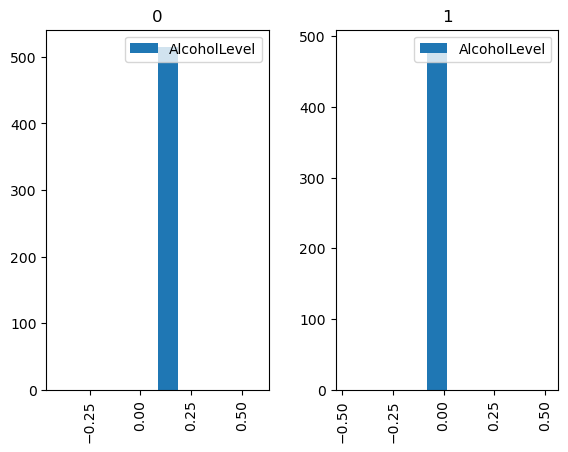

In [45]:
df=pd.DataFrame(dementia_df["AlcoholLevel"],index=dementia_df["Dementia"])
df.hist(legend=True,by="Dementia")

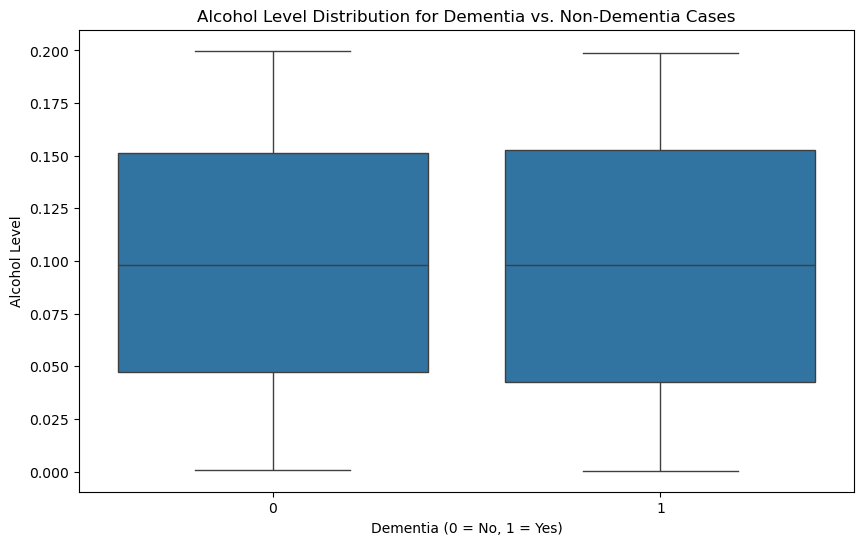

(0.1175333790448546, 0.9064610437749389)

In [47]:
data = pd.read_csv(data_path)
## Calculate the correlation between AlcoholLevel and Dementia
correlation = data[['AlcoholLevel', 'Dementia']].corr().iloc[0, 1]
# Plot the distribution of AlcoholLevel for those with and without Dementia
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dementia', y='AlcoholLevel', data=data)
plt.title('Alcohol Level Distribution for Dementia vs. Non-Dementia Cases')
plt.xlabel('Dementia (0 = No, 1 = Yes)')
plt.ylabel('Alcohol Level')
plt.show()

# Split data based on dementia status
no_dementia = data[data['Dementia'] == 0]['AlcoholLevel']
with_dementia = data[data['Dementia'] == 1]['AlcoholLevel']

# Perform t-test to compare alcohol levels
t_stat, p_value = stats.ttest_ind(no_dementia, with_dementia)

# Output t-test results
t_stat, p_value

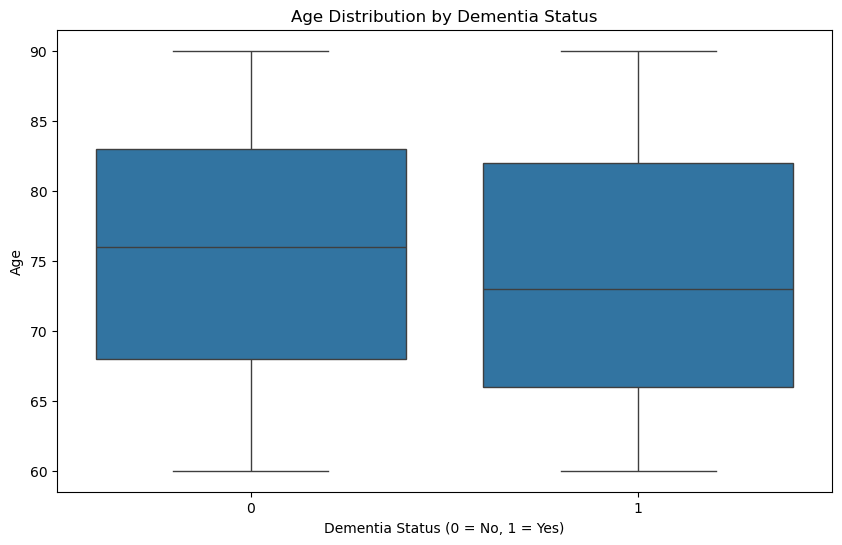

In [49]:
import statsmodels.api as sm

# Visualizing the relationship between age and dementia status using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dementia', y='Age', data=data)
plt.title('Age Distribution by Dementia Status')
plt.xlabel('Dementia Status (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()



/var/folders/vx/2w41pcls7hqb63ss41113gsm0000gn/T/ipykernel_80723/323412206.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dementia_by_alcohol_group = data.groupby('AlcoholGroup')['Dementia'].mean()
/var/folders/vx/2w41pcls7hqb63ss41113gsm0000gn/T/ipykernel_80723/323412206.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dementia_by_alcohol_group.index, y=dementia_by_alcohol_group.values, palette='Blues')


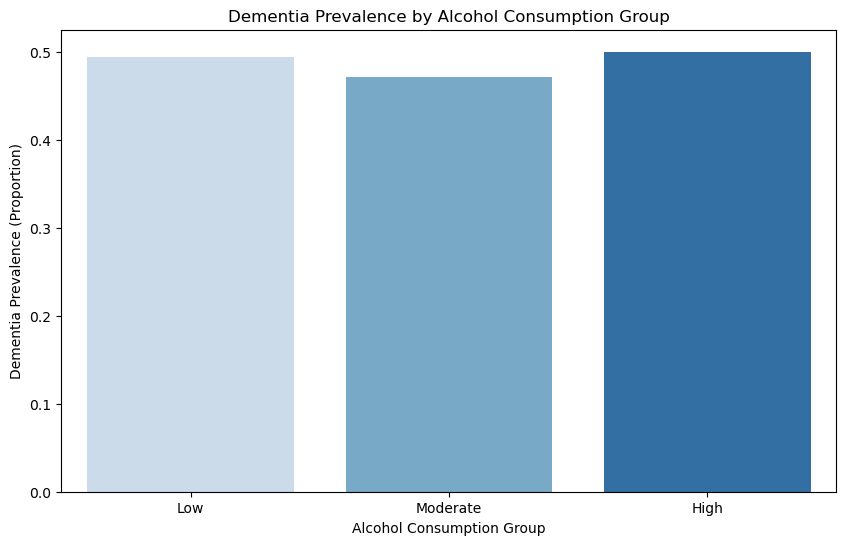

,AlcoholGroup_encoded,Dementia
AlcoholGroup_encoded,1.000000,0.003652
Dementia,0.003652,1.000000


In [50]:
# Categories for Alcohol Consumption
# Create alcohol consumption categories (low, moderate, high)
bins_alcohol = [0, 0.05, 0.15, data['AlcoholLevel'].max()]
labels_alcohol = ['Low','Moderate', 'High']
data['AlcoholGroup'] = pd.cut(data['AlcoholLevel'], bins=bins_alcohol, labels=labels_alcohol)

# Display the count of dementia cases in each alcohol consumption group
dementia_by_alcohol_group = data.groupby('AlcoholGroup')['Dementia'].mean()

# Visualizing the percentage of dementia in each alcohol consumption group
plt.figure(figsize=(10, 6))
sns.barplot(x=dementia_by_alcohol_group.index, y=dementia_by_alcohol_group.values, palette='Blues')
plt.title('Dementia Prevalence by Alcohol Consumption Group')
plt.xlabel('Alcohol Consumption Group')
plt.ylabel('Dementia Prevalence (Proportion)')
plt.show()

# Encoding alcohol group as numeric for correlation analysis
data['AlcoholGroup_encoded'] = data['AlcoholGroup'].cat.codes

# Calculate the correlation between alcohol group and dementia
correlation_alcohol_group = data[['AlcoholGroup_encoded', 'Dementia']].corr()

# Output the correlation matrix
correlation_alcohol_group


In [51]:
# Example:
# Does alcohol consumption level correlate with a higher risk of dementia when controlling for other variables
# like age and smoking status?


# Lakshay

Relevant data for analysis:
   Physical_Activity  Smoking_Status  Cognitive_Test_Scores  \
0          Sedentary  Current Smoker                     10   
1  Moderate Activity   Former Smoker                      1   
2  Moderate Activity   Former Smoker                      8   
3      Mild Activity    Never Smoked                      5   
4      Mild Activity    Never Smoked                      0   
5      Mild Activity   Former Smoker                      1   
6      Mild Activity    Never Smoked                      7   
7      Mild Activity   Former Smoker                      9   
8      Mild Activity   Former Smoker                     10   
9          Sedentary   Former Smoker                      7   

       Nutrition_Diet  Dementia  
0       Low-Carb Diet         0  
1       Low-Carb Diet         1  
2  Mediterranean Diet         0  
3       Balanced Diet         1  
4       Low-Carb Diet         1  
5       Low-Carb Diet         1  
6  Mediterranean Diet         1  
7     

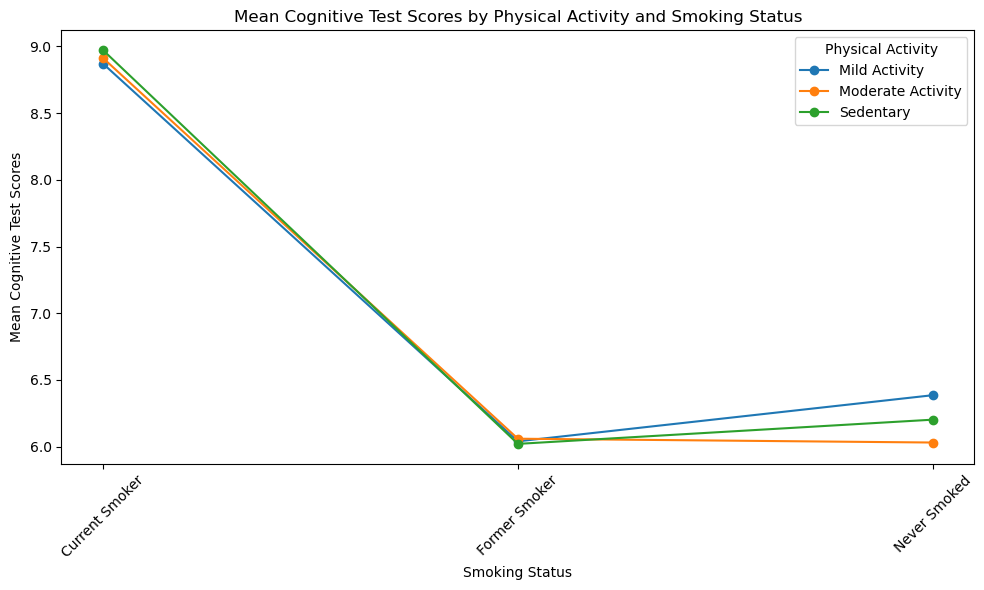

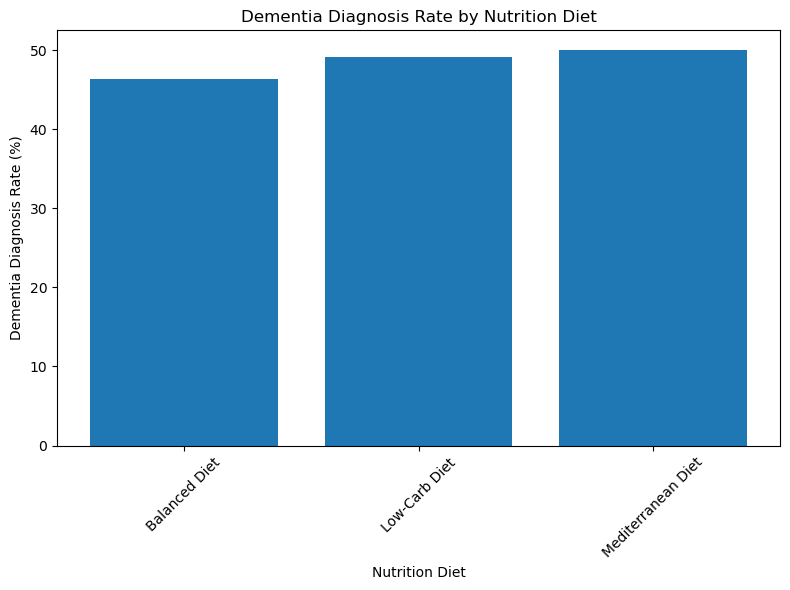

In [54]:
# Display the relevant columns to understand the dataset before analysis
# Display columns: Physical_Activity, Smoking_Status, Cognitive_Test_Scores, Nutrition_Diet, Dementia
relevant_columns = ['Physical_Activity', 'Smoking_Status', 'Cognitive_Test_Scores', 'Nutrition_Diet', 'Dementia']
display_data = dementia_df[relevant_columns].dropna().head(10)  # Show the first 10 rows after dropping rows with missing values
print("Relevant data for analysis:")
print(display_data)

# Now, proceed with the analysis
# Convert Cognitive_Test_Scores to numeric for proper analysis
dementia_df['Cognitive_Test_Scores'] = pd.to_numeric(dementia_df['Cognitive_Test_Scores'], errors='coerce')

# Group by Physical Activity and Smoking Status, then calculate the mean Cognitive Test Scores
grouped_activity_smoking = dementia_df.groupby(['Physical_Activity', 'Smoking_Status'])['Cognitive_Test_Scores'].mean().reset_index()

# Visualization 1: Mean Cognitive Test Scores by Physical Activity and Smoking Status
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for activity in grouped_activity_smoking['Physical_Activity'].unique():
    subset = grouped_activity_smoking[grouped_activity_smoking['Physical_Activity'] == activity]
    plt.plot(subset['Smoking_Status'], subset['Cognitive_Test_Scores'], marker='o', label=activity)

plt.title('Mean Cognitive Test Scores by Physical Activity and Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Mean Cognitive Test Scores')
plt.legend(title='Physical Activity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Convert Dementia column to numeric (assuming 1 represents dementia diagnosis)
dementia_df['Dementia'] = pd.to_numeric(dementia_df['Dementia'], errors='coerce')

# Group by Nutrition_Diet and calculate the dementia diagnosis rate (percentage of patients diagnosed)
grouped_diet_dementia = dementia_df.groupby('Nutrition_Diet')['Dementia'].mean().reset_index()

# Convert the dementia diagnosis rate to percentage
grouped_diet_dementia['Dementia Diagnosis Rate (%)'] = grouped_diet_dementia['Dementia'] * 100

# Visualization 2: Dementia Diagnosis Rate by Nutrition Diet
plt.figure(figsize=(8,6))
plt.bar(grouped_diet_dementia['Nutrition_Diet'], grouped_diet_dementia['Dementia Diagnosis Rate (%)'])
plt.title('Dementia Diagnosis Rate by Nutrition Diet')
plt.xlabel('Nutrition Diet')
plt.ylabel('Dementia Diagnosis Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [58]:
# Example:
# Group by physical activity and smoking status and calculate mean cognitive scores

In [60]:
# Example:
# Group by diet and calculate the dementia diagnosis rate

# Nathaly

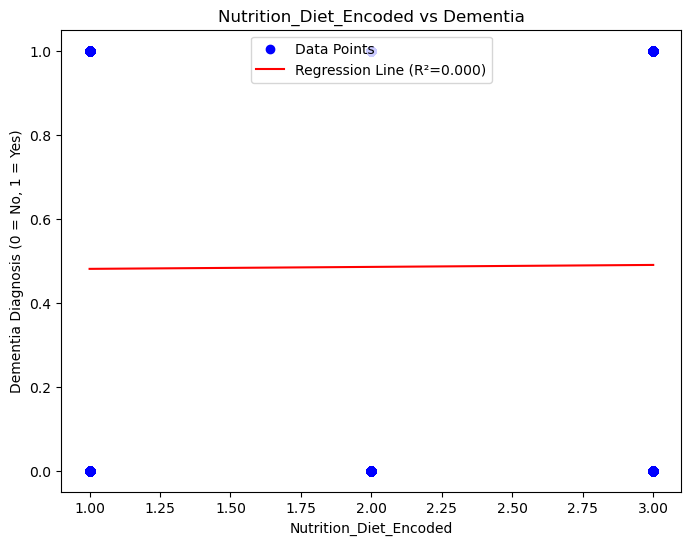

Linear Regression for Nutrition_Diet_Encoded vs Dementia:
Slope: 0.00467110621376903, R-squared: 5.834791867464519e-05, P-value: 0.8093578400556828
0.8093578400556828 is Statistically Non-Significant (fail to reject the null hypothesis)
----------------------------


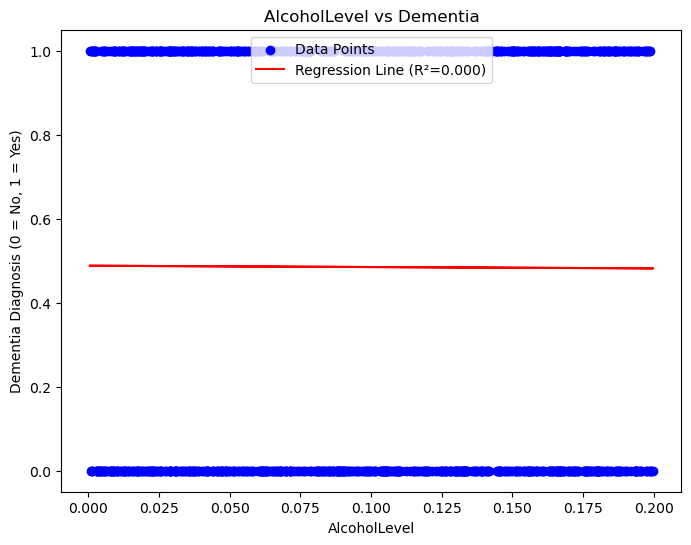

Linear Regression for AlcoholLevel vs Dementia:
Slope: -0.03168366064609586, R-squared: 1.384158715500854e-05, P-value: 0.9064610437749403
0.9064610437749403 is Statistically Non-Significant (fail to reject the null hypothesis)
----------------------------


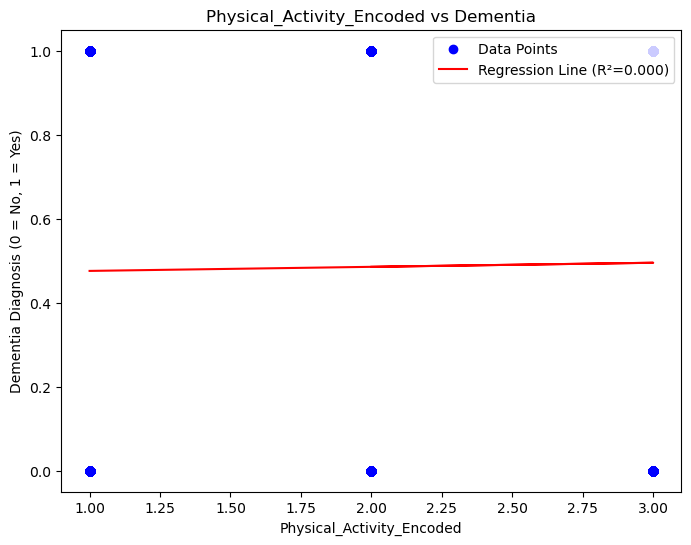

Linear Regression for Physical_Activity_Encoded vs Dementia:
Slope: 0.009717476507750096, R-squared: 0.0002452955234966046, P-value: 0.6208231455137775
0.6208231455137775 is Statistically Non-Significant (fail to reject the null hypothesis)
----------------------------


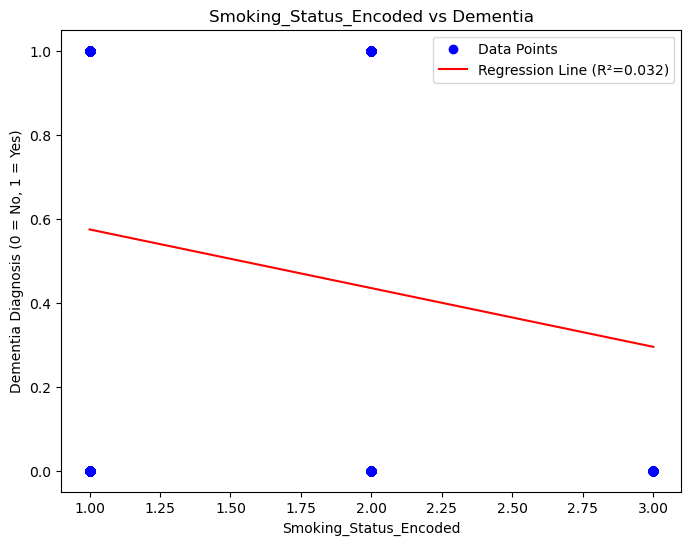

Linear Regression for Smoking_Status_Encoded vs Dementia:
Slope: -0.13974732088106756, R-squared: 0.032131673058551524, P-value: 1.1452551593720502e-08
1.1452551593720502e-08 is Statistically Significant (reject the null hypothesis)
----------------------------


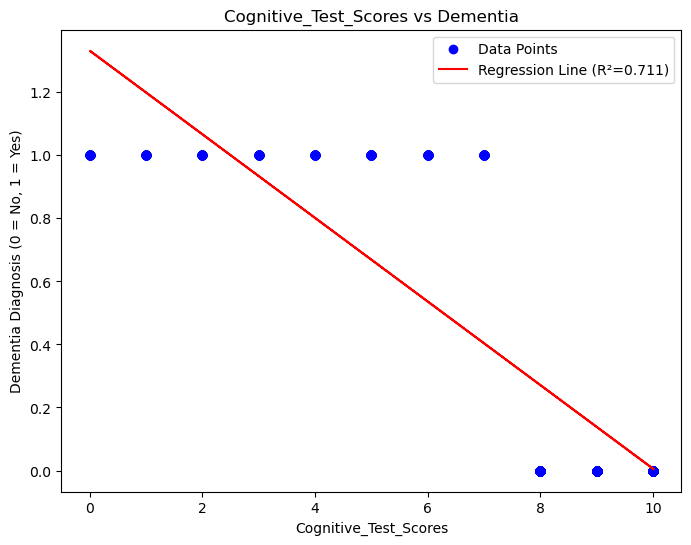

Linear Regression for Cognitive_Test_Scores vs Dementia:
Slope: -0.13256617572920526, R-squared: 0.7110647453271196, P-value: 2.6037694964793524e-271
2.6037694964793524e-271 is Statistically Significant (reject the null hypothesis)
----------------------------


In [81]:
# 5th Part: Statistical Analysis
# ---------------------------------------------------------------------
#lifestyle factor overview 

def pvalue_eval(pval, alpha=0.05):
    if pval <= alpha:
        return f"{pval} is Statistically Significant (reject the null hypothesis)"
    return f"{pval} is Statistically Non-Significant (fail to reject the null hypothesis)"

# Map categories to numeric values
# Physical Activity
physical_activity_mapping = {'Sedentary': 1, 'Mild Activity': 2, 'Moderate Activity': 3, 'High Activity': 4}
dementia_df['Physical_Activity_Encoded'] = dementia_df['Physical_Activity'].map(physical_activity_mapping)

# Smoking Status
smoking_status_mapping = {'Never Smoked': 1, 'Former Smoker': 2, 'Current Smoker': 3}
dementia_df['Smoking_Status_Encoded'] = dementia_df['Smoking_Status'].map(smoking_status_mapping)

#  Nutrition Diet
nutrition_diet_mapping = {'Low-Carb Diet': 1, 'Balanced Diet': 2, 'Mediterranean Diet': 3, 'Other': 4}
dementia_df['Nutrition_Diet_Encoded'] = dementia_df['Nutrition_Diet'].map(nutrition_diet_mapping)

factors = ['Nutrition_Diet_Encoded', 'AlcoholLevel', 'Physical_Activity_Encoded', 'Smoking_Status_Encoded', 'Cognitive_Test_Scores']

for factor in factors:
    # Performing linear regression Nutrition Vs Dementia 
    x = dementia_df[factor]
    y = dementia_df['Dementia']
    
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # Scatter plot with regression line
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', label='Data Points')
    plt.plot(x, slope * x + intercept, color='red', label=f'Regression Line (R²={r_value**2:.3f})')
    plt.title(f'{factor} vs Dementia')
    plt.xlabel(factor)
    plt.ylabel('Dementia Diagnosis (0 = No, 1 = Yes)')
    plt.legend()
    plt.show()
    
    # Print the results
    print(f"Linear Regression for {factor} vs Dementia:")
    print(f"Slope: {slope}, R-squared: {r_value**2}, P-value: {p_value}")
    print(pvalue_eval(p_value))
    print('----------------------------')



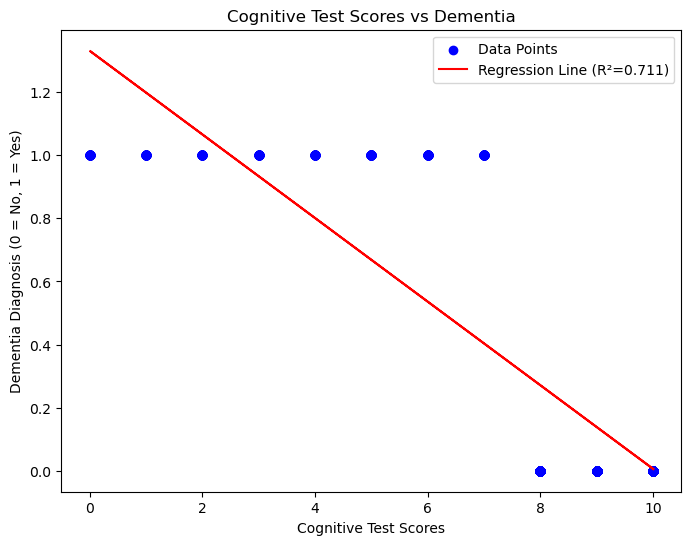

Linear Regression for Cognitive Test Scores vs Dementia:
Slope: -0.13256617572920526, R-squared: 0.7110647453271196, P-value: 2.6037694964793524e-271
2.6037694964793524e-271 is Statistically Significant (reject the null hypothesis)


In [85]:
#Cognitive Test Scores and Dementia

# Linear Regression specifically for Cognitive Test Scores
x_cognitive = dementia_df['Cognitive_Test_Scores']
y_dementia = dementia_df['Dementia']

slope_cognitive, intercept_cognitive, r_value_cognitive, p_value_cognitive, std_err_cognitive = linregress(x_cognitive, y_dementia)

plt.figure(figsize=(8, 6))
plt.scatter(x_cognitive, y_dementia, color='blue', label='Data Points')
plt.plot(x_cognitive, slope_cognitive * x_cognitive + intercept_cognitive, color='red', label=f'Regression Line (R²={r_value_cognitive**2:.3f})')
plt.title('Cognitive Test Scores vs Dementia')
plt.xlabel('Cognitive Test Scores')
plt.ylabel('Dementia Diagnosis (0 = No, 1 = Yes)')
plt.legend()
plt.show()

# Print final results for Cognitive Test Scores
print(f"Linear Regression for Cognitive Test Scores vs Dementia:")
print(f"Slope: {slope_cognitive}, R-squared: {r_value_cognitive**2}, P-value: {p_value_cognitive}")
print(pvalue_eval(p_value_cognitive))


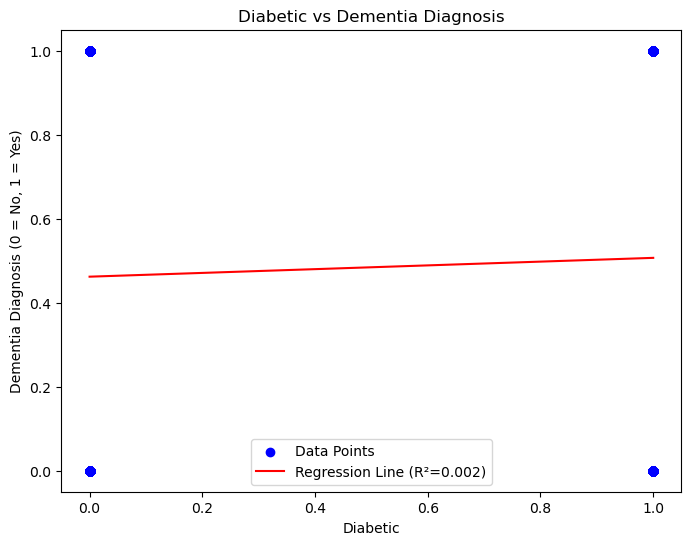

Linear Regression for Diabetic vs Dementia:
Slope: 0.04481029175722778, R-squared: 0.0020084124360811324, P-value: 0.15673928944855745
0.15673928944855745 is Statistically Non-Significant (fail to reject the null hypothesis)
----------------------------


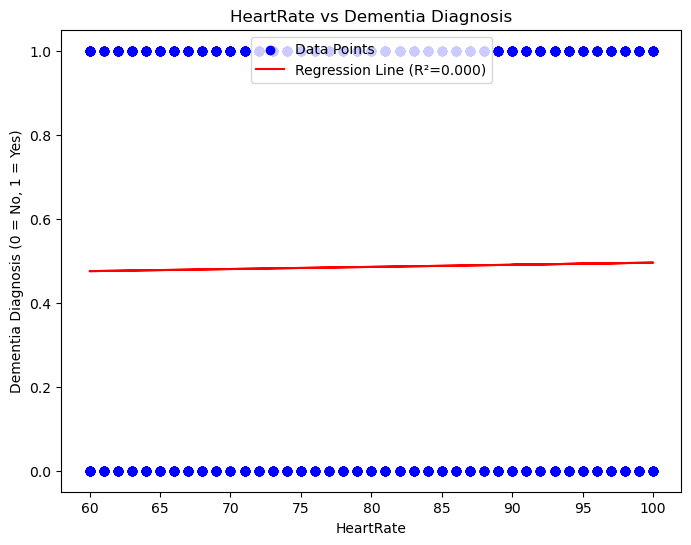

Linear Regression for HeartRate vs Dementia:
Slope: 0.0005069776049189787, R-squared: 0.000150697837162284, P-value: 0.6982178689241507
0.6982178689241507 is Statistically Non-Significant (fail to reject the null hypothesis)
----------------------------


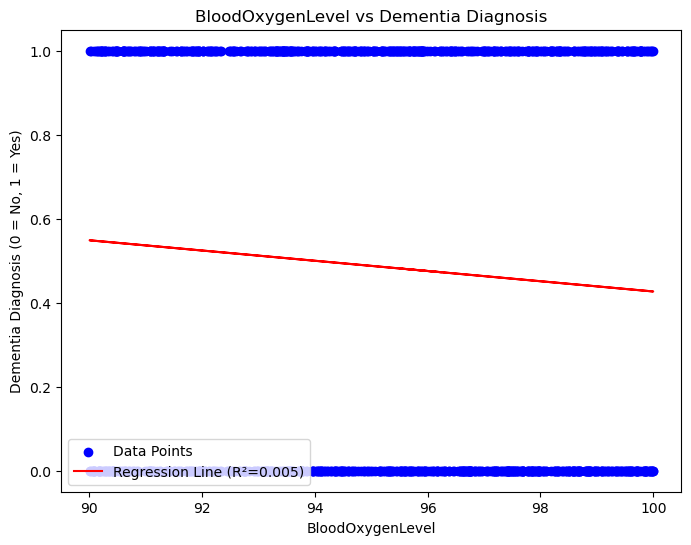

Linear Regression for BloodOxygenLevel vs Dementia:
Slope: -0.012197227658855376, R-squared: 0.0051057004059690035, P-value: 0.02384345329489675
0.02384345329489675 is Statistically Significant (reject the null hypothesis)
----------------------------


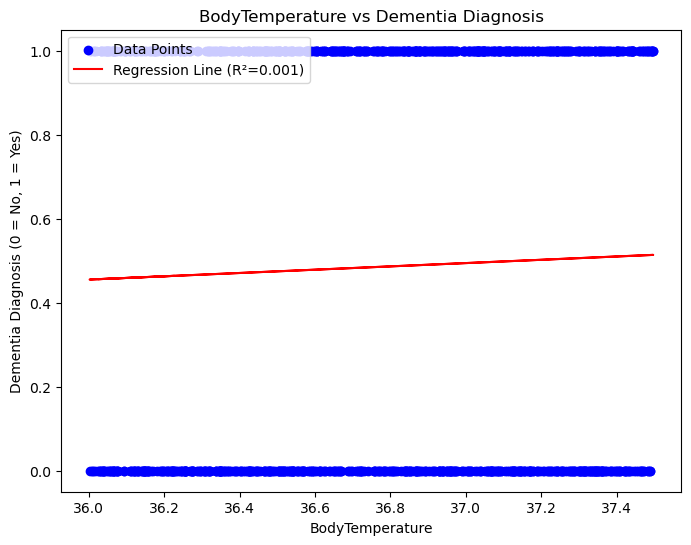

Linear Regression for BodyTemperature vs Dementia:
Slope: 0.03929731717288622, R-squared: 0.0011510873467295538, P-value: 0.283785575807526
0.283785575807526 is Statistically Non-Significant (fail to reject the null hypothesis)
----------------------------


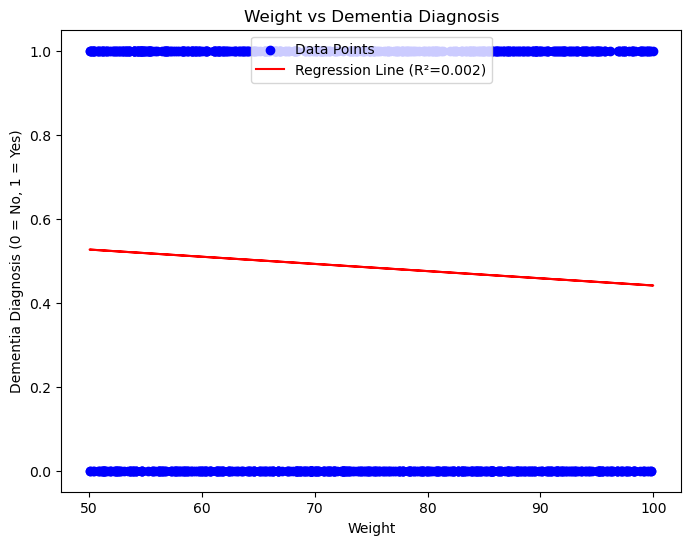

Linear Regression for Weight vs Dementia:
Slope: -0.0017134326739635844, R-squared: 0.0024564804319245595, P-value: 0.11727402051177074
0.11727402051177074 is Statistically Non-Significant (fail to reject the null hypothesis)
----------------------------


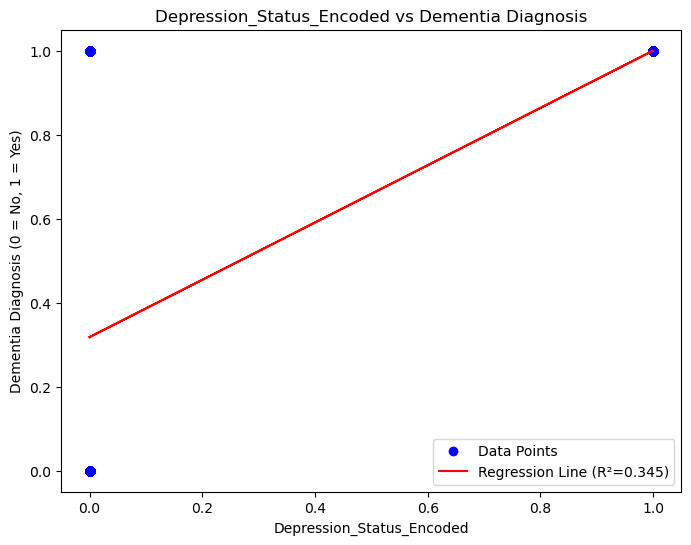

Linear Regression for Depression_Status_Encoded vs Dementia:
Slope: 0.6821192052980135, R-squared: 0.3445756810268314, P-value: 1.1955140354494841e-93
1.1955140354494841e-93 is Statistically Significant (reject the null hypothesis)
----------------------------


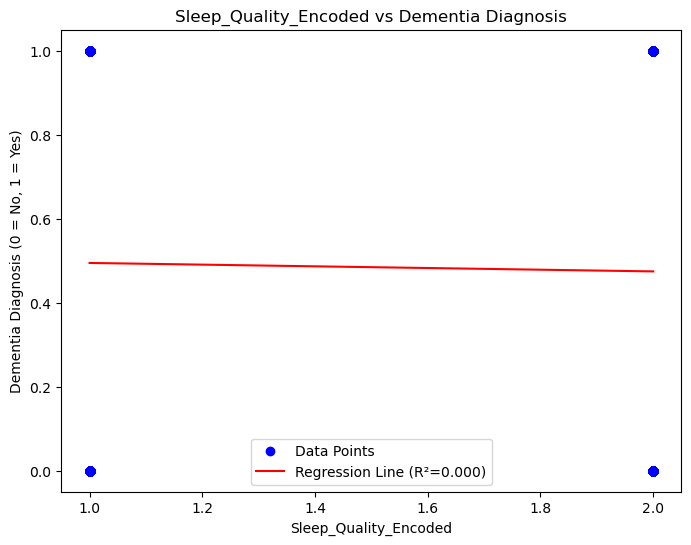

Linear Regression for Sleep_Quality_Encoded vs Dementia:
Slope: -0.020133095433283513, R-squared: 0.00040383068009508717, P-value: 0.5255940697359964
0.5255940697359964 is Statistically Non-Significant (fail to reject the null hypothesis)
----------------------------


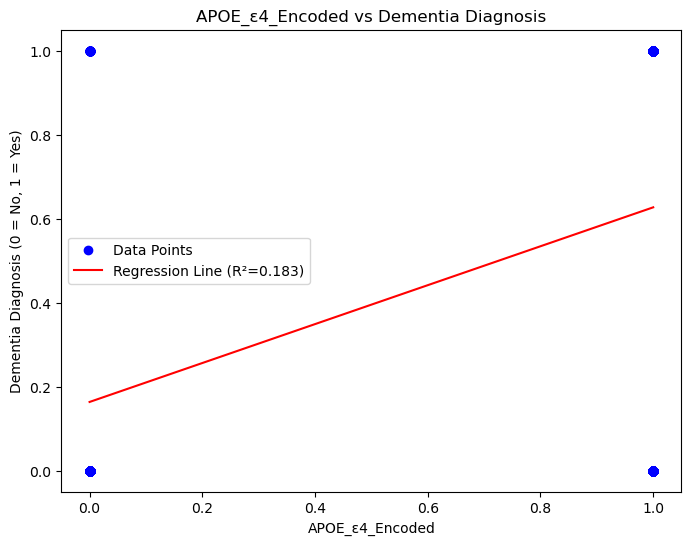

Linear Regression for APOE_ε4_Encoded vs Dementia:
Slope: 0.4634024599272952, R-squared: 0.182578064583906, P-value: 1.2031399892411532e-45
1.2031399892411532e-45 is Statistically Significant (reject the null hypothesis)
----------------------------


In [89]:
# Additional Factors 
# Define a function to evaluate p-values
def pvalue_eval(pval, alpha=0.05):
    if pval <= alpha:
        return f"{pval} is Statistically Significant (reject the null hypothesis)"
    return f"{pval} is Statistically Non-Significant (fail to reject the null hypothesis)"

# APOE_ε4 and Depression Status
dementia_df['APOE_ε4_Encoded'] = dementia_df['APOE_ε4'].map({'Negative': 0, 'Positive': 1})
dementia_df['Depression_Status_Encoded'] = dementia_df['Depression_Status'].map({'No': 0, 'Yes': 1})

# Sleep Quality
sleep_quality_mapping = {'Poor': 1, 'Good': 2}
dementia_df['Sleep_Quality_Encoded'] = dementia_df['Sleep_Quality'].map(sleep_quality_mapping)

# Factors to analyze: Diabetic Status, Heart Rate, Blood Oxygen Level, Body Temperature, Weight, Depression Status, Sleep Quality, APOE_ε4
factors = ['Diabetic', 'HeartRate', 'BloodOxygenLevel', 'BodyTemperature', 'Weight', 'Depression_Status_Encoded', 'Sleep_Quality_Encoded', 'APOE_ε4_Encoded']

# Linear regression for each factor with Dementia
for factor in factors:
    # linear regression
    x = dementia_df[factor]
    y = dementia_df['Dementia']
    
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # regression line
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', label='Data Points')
    plt.plot(x, slope * x + intercept, color='red', label=f'Regression Line (R²={r_value**2:.3f})')
    plt.title(f'{factor} vs Dementia Diagnosis')
    plt.xlabel(factor)
    plt.ylabel('Dementia Diagnosis (0 = No, 1 = Yes)')
    plt.legend()
    plt.show()
    
    # Print the results
    print(f"Linear Regression for {factor} vs Dementia:")
    print(f"Slope: {slope}, R-squared: {r_value**2}, P-value: {p_value}")
    print(pvalue_eval(p_value))
    print('----------------------------')

In [ ]:
# Conclusion: Insights and Recommendations
